## Gradient Descent

#### Importing Packages

In [1]:
from logisticregression import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import random

#### Source Code

Source code for this post can be found at https://github.com/davidmbyrne/davidmbyrne.github.io/blob/main/posts/gradient-descent-blog-post/logisticregression.py

The implementation of gradient descent was rather straightforward. The gradient method was rather significant, and employed the logistic sigmoid function to calculate:  
$$\nabla L(w) = \frac{1}{n} \sum_{i=1}^n (\sigma(\langle w,x_i \rangle) - y_i)x_i$$
I used this value in the update step of the fit method, 
$$w^{(i+1)} = w^{(i)} - \alpha \nabla L(w)$$
where alpha is the model's learning rate.
This update is called anytime that the current loss calculated by the empirical risk method is not computationally close to the previous loss. Once our loss function is successfully minimized, the algorithm converges to a value for $w$ .

#### Playing with learning rate
One of the variables that gradient decent utlizes is the learning rate, or alpha. We utilize this value in calculating a new weight vector $w$, and it determines the impact that the gradient has in each step of modifying $w$. A small value of alpha will make the steps from each iteration to the next smaller, while a larger alpha will cause larger jumps. When choosing an effective value for alpha, it is important to consider this balance. A very small alpha will cause the minimization of the loss function to take a long time to converge, but too large of an alpha value will make it impossible to converge at all. We can observe this case of non convergence.

In [6]:
random.seed(14)
X, y = make_moons(n_samples = 100, noise = 0.35)

##### Appropriate Alpha

In [3]:
LR = LogisticRegression()
m_epochs = 1000
alpha = 0.1

LR.fit(X, y, m_epochs, alpha)

Converged after 12 tries


##### Too Large of an Alpha

In [5]:
random.seed(14)
LR = LogisticRegression()
m_epochs = 1000
alpha = 3

LR.fit(X, y, m_epochs, alpha)

Reached maximum epochs before converging


#### Batch Size and Stochastic Gradient Descent
In addition to our typical run of the mill gradient descent, we can implement stochastic gradient descent, which divides the full data set into "batches" or subsets of a given size and calculates the gradient over just that batch. We can use this to our advantage, as manipulating batch size can affect the speed at which the loss function converges.

In [221]:
p_features = 20
X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])


In [272]:
LR = LogisticRegression()

term_arr = []
m_epochs = 1000
alpha = 0.05
batch_size = 5
for i in range(100):
    LR.fit_stochastic(X, y, m_epochs, alpha, batch_size)
    term_arr.append(LR.stop)
print("The average amount of epochs to convergence was " + str(sum(term_arr)/100))

The average amount of epochs to convergence was 2.89


In [273]:
LR = LogisticRegression()

term_arr = []
m_epochs = 1000
alpha = 0.05
batch_size = 20
for i in range(100):
    LR.fit_stochastic(X, y, m_epochs, alpha, batch_size)
    term_arr.append(LR.stop)
print("The average amount of epochs to convergence was " + str(sum(term_arr)/100))

The average amount of epochs to convergence was 5.04


In this case, using a smaller batch size of 5 led to convergence in nearly half of the total epochs when compared to a batch size of 20. To see a greater trend, we can try all batch sizes from 2 to 30.

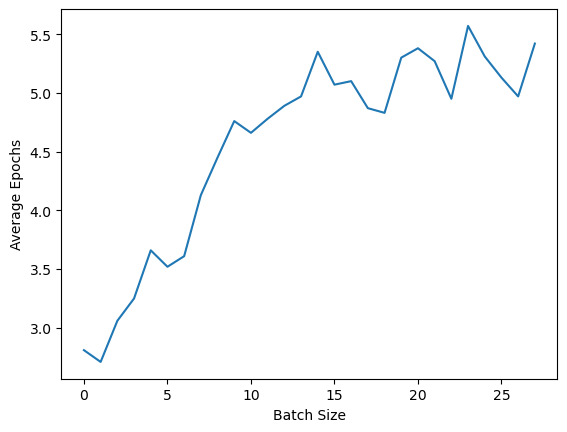

In [280]:
tracker = []
for i in range(2,30):
    term_arr = []
    m_epochs = 1000
    alpha = 0.05
    batch_size = i+2
    for i in range(100):
        LR.fit_stochastic(X, y, m_epochs, alpha, batch_size)
        term_arr.append(LR.stop)
    tracker.append(sum(term_arr)/100)
fig = plt.plot(tracker)
xlab = plt.xlabel("Batch Size")
ylab = plt.ylabel("Average Epochs")

The larger experiment confirms the previous belief, and smaller batch sizes have faster convergence times, with the change plateauing after a batch size of about 15. 